In [3]:
from time import time
import datetime

import pandas as pd
import numpy as np
import quandl

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import TensorBoard
from fastai.tabular import add_datepart

#to get stock OHCL data
from stocker import Stocker

quandl.ApiConfig.api_key = 'BshViJ52EjWkDVrb9WX3'

In [4]:
from keras import backend as K

In [5]:
sp500 = ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'JEC', 'JBHT', 'JEF', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LW', 'LEG', 'LEN', 'LLY', 'LNC', 'LIN', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'TMO', 'TIF', 'TWTR', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WCG', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
best100 = ['msci', 'aig', 'cf', 'dte', 'gww', 're', 'apa', 'ual', 'ndaq', 'amp', 'pru', 'pcar', 'csx', 'dre', 'sna', 'rtn', 'ma', 'usb', 'o', 'hon', 'antm', 'wat', 'tfx', 'akam', 'sti', 'mnst', 'ads', 'dva', 'pep', 'wynn', 'mdlz', 'regn', 'incy', 'pnr', 'etr', 'tss', 'duk', 'mtb', 'ksu', 'fcx', 'aee', 'wfc', 'flir', 'sbac', 'vno', 'mat', 'zion', 'nwl', 'gd', 'amgn', 'mac', 'oxy', 'ed', 'sre', 'blk', 'pld', 'lmt', 'xel', 'gild', 'ctl', 'vlo', 'aes', 'aos', 'arnc', 'eqix', 'cof', 'k', 'es', 'dhr', 'hsy', 'pgr', 'irm', 'udr', 'amzn', 'bk', 'mmc', 'hcp', 'ppl', 'tgt', 'fmc', 'stt', 'ba', 'mcd', 'cme', 'ivz', 'axp', 'intc', 'xom', 'idxx', 'ess', 'amg', 'afl', 'ups', 'mo', 'omc', 'hum', 'swk', 'unm', 'cern', 'ce', 'unp']

In [6]:
period = 365 * 10
# period of 10 years from 12-31-2017 backwards go back to 01-04-2008
date_range = ('01-01-2008', '12-31-2017')
max_stocker = '03-27-2018'
min_date = datetime.datetime.strptime(date_range[0], "%m-%d-%Y")
max_date = datetime.datetime.strptime(max_stocker, "%m-%d-%Y")

In [7]:

tickers = best100[:50]
tickerobjs = {} 
for ticker in tickers:
    tickerobjs[ticker] = (Stocker(ticker=ticker))

C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:68: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  self.starting_price = float(self.stock.ix[0, 'Adj. Open'])
C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:71: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  self.most_recent_price = float(self.stock.ix[len(self.stock) - 1, 'y'])


MSCI Stocker Initialized. Data covers 2007-11-15 to 2018-03-27.
AIG Stocker Initialized. Data covers 1984-09-07 to 2018-03-27.
CF Stocker Initialized. Data covers 2005-08-11 to 2018-03-27.
DTE Stocker Initialized. Data covers 1970-01-02 to 2018-03-27.
GWW Stocker Initialized. Data covers 1984-12-17 to 2018-03-27.
RE Stocker Initialized. Data covers 1995-10-03 to 2018-03-27.
APA Stocker Initialized. Data covers 1979-05-15 to 2018-03-27.
UAL Stocker Initialized. Data covers 2006-02-06 to 2018-03-27.
NDAQ Stocker Initialized. Data covers 2002-07-01 to 2018-03-27.
AMP Stocker Initialized. Data covers 2005-09-15 to 2018-03-27.
PRU Stocker Initialized. Data covers 2001-12-13 to 2018-03-27.
PCAR Stocker Initialized. Data covers 1986-07-09 to 2018-03-27.
CSX Stocker Initialized. Data covers 1980-11-03 to 2018-03-27.
DRE Stocker Initialized. Data covers 1987-11-05 to 2018-03-27.
SNA Stocker Initialized. Data covers 1985-07-01 to 2018-03-27.
RTN Stocker Initialized. Data covers 1981-12-31 to 201

In [8]:
for i, (k, v) in enumerate(tickerobjs.items()): 
    print(i, k, v)

0 msci <stocker.Stocker object at 0x000001D203CCB708>
1 aig <stocker.Stocker object at 0x000001D203D09F48>
2 cf <stocker.Stocker object at 0x000001D203EA9E88>
3 dte <stocker.Stocker object at 0x000001D203CD3DC8>
4 gww <stocker.Stocker object at 0x000001D203CCE508>
5 re <stocker.Stocker object at 0x000001D203D013C8>
6 apa <stocker.Stocker object at 0x000001D25E457748>
7 ual <stocker.Stocker object at 0x000001D203CEF3C8>
8 ndaq <stocker.Stocker object at 0x000001D203CFF4C8>
9 amp <stocker.Stocker object at 0x000001D20364C508>
10 pru <stocker.Stocker object at 0x000001D203EAC3C8>
11 pcar <stocker.Stocker object at 0x000001D203CF10C8>
12 csx <stocker.Stocker object at 0x000001D203D0C6C8>
13 dre <stocker.Stocker object at 0x000001D203D10088>
14 sna <stocker.Stocker object at 0x000001D203D0C888>
15 rtn <stocker.Stocker object at 0x000001D203E5E648>
16 ma <stocker.Stocker object at 0x000001D203ED1E88>
17 usb <stocker.Stocker object at 0x000001D203CEFE08>
18 o <stocker.Stocker object at 0x0000

In [10]:
tickers_ciks = pd.read_csv('AllSecTickers.csv')
filing_sentiments = {}
for ticker in tickers:
    cik = int(tickers_ciks.loc[tickers_ciks['ticker'] == ticker]['cik'])
    fname = str(cik).zfill(10) + '.csv'
    
    tenQs = pd.read_csv(
        'sentiment-scores/10-Q/{}'.format(fname),
        names=['Cik','Coname','Date','Form','Secname','Neg_Score','Neu_Score','Pos_Score']
    )

    tenKs = pd.read_csv(
        'sentiment-scores/10-K/{}'.format(fname),
        names=['Cik','Coname','Date','Form','Secname','Neg_Score','Neu_Score','Pos_Score']
    )
    
    sentiments = pd.concat([tenQs, tenKs], ignore_index=True)
    sentiments['Date'] = pd.to_datetime(sentiments.Date, format='%Y-%m-%d')
    sentiments.index = sentiments['Date']
    sentiments = sentiments.sort_index(ascending=True, axis=0)
    
    filing_sentiments[ticker] = sentiments

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


In [11]:
finals = {}
for i, (k, v) in enumerate(tickerobjs.items()):
    try:
        if v.min_date.date() < min_date.date() and v.max_date.date() <= max_date.date():
            finals[k] = v
    except AttributeError:
        pass
print(len(finals))
tickerobjs = finals

50


In [12]:
stocks_data = {}

for i, (ticker, stocker) in enumerate(tickerobjs.items()):
    df = stocker.make_df(date_range[0], date_range[1])
    # ddd date features
    add_datepart(df, 'Date', drop=False)
    # drop unwanted columns date feature columns
    df = df.drop(['Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'], axis=1)
    df['Is_month_end'] = df['Is_month_end'].astype(int)
    df['Is_month_start'] = df['Is_month_start'].astype(int)
    # setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    # sort df by date
    df = df.sort_index(ascending=True, axis=0)
    
    stocks_data[ticker] = df

C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:170: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:171: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


In [13]:
date_list = pd.date_range(start=date_range[0], end=date_range[1], freq='B')
date_df = pd.DataFrame(date_list).rename(columns={0: 'Date'})
date_df.index = date_df['Date']
date_df.rename(columns={'Date': 'Date2'}, inplace=True)

for i, (ticker, df) in enumerate(stocks_data.items()):
    stocks_data[ticker] = pd.concat([df, date_df], ignore_index=False, axis=1)

In [14]:
for i, (ticker, df) in enumerate(stocks_data.items()):
    sentiment_df = filing_sentiments[ticker]
    forward_merged = pd.merge_asof(df, sentiment_df, left_index=True, right_index=True, direction='backward')
    stocks_data[ticker] = forward_merged

NameError: name 'filing_sentiments' is not defined

In [15]:
TRAIN_SPLIT = 0.8  # 80% of total dataset
VAL_TEST_SPLIT = 0.5  # 50% of the remaining dataset

total_count = len(stocks_data[list(stocks_data.keys())[0]])
train_count = int(total_count * TRAIN_SPLIT)
left = total_count - train_count
valid_count = int(left * VAL_TEST_SPLIT)
test_count = int(left - valid_count)

print(sum([train_count, valid_count, test_count]))
total_count, train_count, valid_count, test_count

2609


(2609, 2087, 261, 261)

In [17]:
pick_columns = {
'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', 'Month', 'Week', 'Day', 'Dayofweek', 
    'Dayofyear', 'Is_month_end', 'Is_month_start', 'Neg_Score'
}
y_column = {'Adj. Close'}
x_columns = pick_columns - y_column

for i, (ticker, df) in enumerate(stocks_data.items()):
    # creating new dataframe

    new_data = pd.DataFrame(df, columns=pick_columns).interpolate(limit_direction='both')
        
    x_df = pd.DataFrame(new_data, columns=x_columns)
    y_df = pd.DataFrame(new_data, columns=y_column)
    stocks_data[ticker] = {
        'x': x_df, 'y': y_df,
        'x_train': x_df[0:train_count], 'y_train': y_df[0:train_count],
        'x_valid': x_df[train_count:train_count+valid_count], 'y_valid': y_df[train_count:train_count+valid_count],
        'x_test': x_df[train_count+valid_count:], 'y_test': y_df[train_count+valid_count:],
        'new_data': new_data
    }

In [18]:
forward_merged = stocks_data['msci']['x']
forward_merged[forward_merged.index >= '2008-04-09'].head()

,Dayofweek,Week,Day,Adj. Volume,Is_month_end,Is_month_start,Neg_Score,Adj. High,Adj. Low,Adj. Open,Month,Dayofyear
Date,,,,,,,,,,,,
2008-04-09,2.0,15.0,9.0,835100.0,0.0,0.0,NaN,28.262311,23.712252,26.925191,4.0,100.0
2008-04-10,3.0,15.0,10.0,159500.0,0.0,0.0,NaN,28.993399,26.521168,28.993399,4.0,101.0
2008-04-11,4.0,15.0,11.0,173800.0,0.0,0.0,NaN,27.887148,26.097907,26.934810,4.0,102.0
2008-04-14,0.0,16.0,14.0,151000.0,0.0,0.0,NaN,27.213778,26.367255,26.742419,4.0,105.0
2008-04-15,1.0,16.0,15.0,84500.0,0.0,0.0,NaN,27.059865,25.741983,26.848234,4.0,106.0


In [19]:
from numpy import hstack
from keras.preprocessing.sequence import TimeseriesGenerator

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_series = []
    y_series = []
    x_train_series = []
    y_train_series = []
    x_valid_series = []
    y_valid_series = []
    x_test_series = []
    y_test_series = []
    
    ds['x_values'] = ds['x'].values
    ds['y_values'] = ds['y'].values
    
    ds['x_train_values'] = ds['x_train'].values
    ds['y_train_values'] = ds['y_train'].values
    
    ds['x_valid_values'] = ds['x_valid'].values
    ds['y_valid_values'] = ds['y_valid'].values
    
    ds['x_test_values'] = ds['x_test'].values
    ds['y_test_values'] = ds['y_test'].values
    
    # Append values
    x_series.append(ds['x_values'])
    y_series.append(ds['y_values'])
    
    x_train_series.append(ds['x_train_values'])
    y_train_series.append(ds['y_train_values'])
    
    x_valid_series.append(ds['x_valid_values'])
    y_valid_series.append(ds['y_valid_values'])
    
    x_test_series.append(ds['x_test_values'])
    y_test_series.append(ds['y_test_values'])
    

    x_dataset = hstack(tuple(x_series))
    y_dataset = hstack(tuple(y_series))

    x_train_dataset = hstack(tuple(x_train_series))
    y_train_dataset = hstack(tuple(y_train_series))

    x_valid_dataset = hstack(tuple(x_valid_series))
    y_valid_dataset = hstack(tuple(y_valid_series))

    x_test_dataset = hstack(tuple(x_test_series))
    y_test_dataset = hstack(tuple(y_test_series))

    # fit scalers on full series
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))

    x_dataset = x_scaler.fit_transform(x_dataset)
    y_dataset = y_scaler.fit_transform(y_dataset)
    
    # Scale train and validation datasets
    x_train_dataset = x_scaler.transform(x_train_dataset)
    y_train_dataset = y_scaler.transform(y_train_dataset)

    x_valid_dataset = x_scaler.transform(x_valid_dataset)
    y_valid_dataset = y_scaler.transform(y_valid_dataset)

    x_test_dataset = x_scaler.transform(x_test_dataset)
    y_test_dataset = y_scaler.transform(y_test_dataset)
    
    ds['x_train_dataset'] = x_train_dataset
    ds['y_train_dataset'] = y_train_dataset
    
    ds['x_valid_dataset'] = x_valid_dataset
    ds['y_valid_dataset'] = y_valid_dataset
    
    ds['x_test_dataset'] = x_test_dataset
    ds['y_test_dataset'] = y_test_dataset
    
    # Store feature scalers
    ds['x_scaler'] = x_scaler
    ds['y_scaler'] = y_scaler
    
    print('*' * 5 + 'Train shapes for ' + ticker)
    print(x_train_dataset.shape, y_train_dataset.shape) 
    
    print('*' * 5 + 'Validation shapes for ' + ticker)
    print(x_valid_dataset.shape, y_valid_dataset.shape) 
    
    print('*' * 5 + 'Test shapes for ' + ticker)
    print(x_test_dataset.shape, y_test_dataset.shape)

*****Train shapes for msci
(2087, 12) (2087, 1)
*****Validation shapes for msci
(261, 12) (261, 1)
*****Test shapes for msci
(261, 12) (261, 1)
*****Train shapes for aig
(2087, 12) (2087, 1)
*****Validation shapes for aig
(261, 12) (261, 1)
*****Test shapes for aig
(261, 12) (261, 1)
*****Train shapes for cf
(2087, 12) (2087, 1)
*****Validation shapes for cf
(261, 12) (261, 1)
*****Test shapes for cf
(261, 12) (261, 1)
*****Train shapes for dte
(2087, 12) (2087, 1)
*****Validation shapes for dte
(261, 12) (261, 1)
*****Test shapes for dte
(261, 12) (261, 1)
*****Train shapes for gww
(2087, 12) (2087, 1)
*****Validation shapes for gww
(261, 12) (261, 1)
*****Test shapes for gww
(261, 12) (261, 1)
*****Train shapes for re
(2087, 12) (2087, 1)
*****Validation shapes for re
(261, 12) (261, 1)
*****Test shapes for re
(261, 12) (261, 1)
*****Train shapes for apa
(2087, 12) (2087, 1)
*****Validation shapes for apa
(261, 12) (261, 1)
*****Test shapes for apa
(261, 12) (261, 1)
*****Train shape

C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Tanay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355

In [20]:
window_length = 90
BATCH_SIZE = int(window_length / 5)

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_train_dataset = ds['x_train_dataset']
    y_train_dataset = ds['y_train_dataset']
    
    x_valid_dataset = ds['x_valid_dataset']
    y_valid_dataset = ds['y_valid_dataset']
    
    x_test_dataset = ds['x_test_dataset']
    y_test_dataset = ds['y_test_dataset']
    
    train_generator = TimeseriesGenerator(x_train_dataset, y_train_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Train samples for {}: {}'.format(ticker, len(train_generator)))

    valid_generator = TimeseriesGenerator(x_valid_dataset, y_valid_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Validation samples for {}: {}'.format(ticker, len(valid_generator)))

    test_generator = TimeseriesGenerator(x_test_dataset, y_test_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Test samples for {}: {}'.format(ticker, len(test_generator)))
    
    ds['train_generator'] = train_generator
    ds['valid_generator'] = valid_generator
    ds['test_generator'] = test_generator

Train samples for msci: 111
Validation samples for msci: 10
Test samples for msci: 10
Train samples for aig: 111
Validation samples for aig: 10
Test samples for aig: 10
Train samples for cf: 111
Validation samples for cf: 10
Test samples for cf: 10
Train samples for dte: 111
Validation samples for dte: 10
Test samples for dte: 10
Train samples for gww: 111
Validation samples for gww: 10
Test samples for gww: 10
Train samples for re: 111
Validation samples for re: 10
Test samples for re: 10
Train samples for apa: 111
Validation samples for apa: 10
Test samples for apa: 10
Train samples for ual: 111
Validation samples for ual: 10
Test samples for ual: 10
Train samples for ndaq: 111
Validation samples for ndaq: 10
Test samples for ndaq: 10
Train samples for amp: 111
Validation samples for amp: 10
Test samples for amp: 10
Train samples for pru: 111
Validation samples for pru: 10
Test samples for pru: 10
Train samples for pcar: 111
Validation samples for pcar: 10
Test samples for pcar: 10
T

*****Training for msci
Epoch 1/20
  4/111 [>.............................] - ETA: 1:05 - loss: nan

C:\Users\Tanay\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.617791). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


111/111 [==============================] - 10s 94ms/step - loss: nan - val_loss: nan
Epoch 2/20
111/111 [==============================] - 8s 73ms/step - loss: nan - val_loss: nan
Epoch 3/20
111/111 [==============================] - 8s 72ms/step - loss: nan - val_loss: nan
Epoch 4/20
111/111 [==============================] - 8s 73ms/step - loss: nan - val_loss: nan
Epoch 5/20
111/111 [==============================] - 9s 85ms/step - loss: nan - val_loss: nan
Epoch 6/20
111/111 [==============================] - 10s 88ms/step - loss: nan - val_loss: nan
Epoch 7/20
111/111 [==============================] - 10s 90ms/step - loss: nan - val_loss: nan
Epoch 8/20
111/111 [==============================] - 10s 89ms/step - loss: nan - val_loss: nan
Epoch 9/20
111/111 [==============================] - 10s 91ms/step - loss: nan - val_loss: nan
Epoch 10/20
111/111 [==============================] - 11s 96ms/step - loss: nan - val_loss: nan
Epoch 11/20
111/111 [==============================] -

FileNotFoundError: [Errno 2] No such file or directory: 'plotsneg/msci.png'

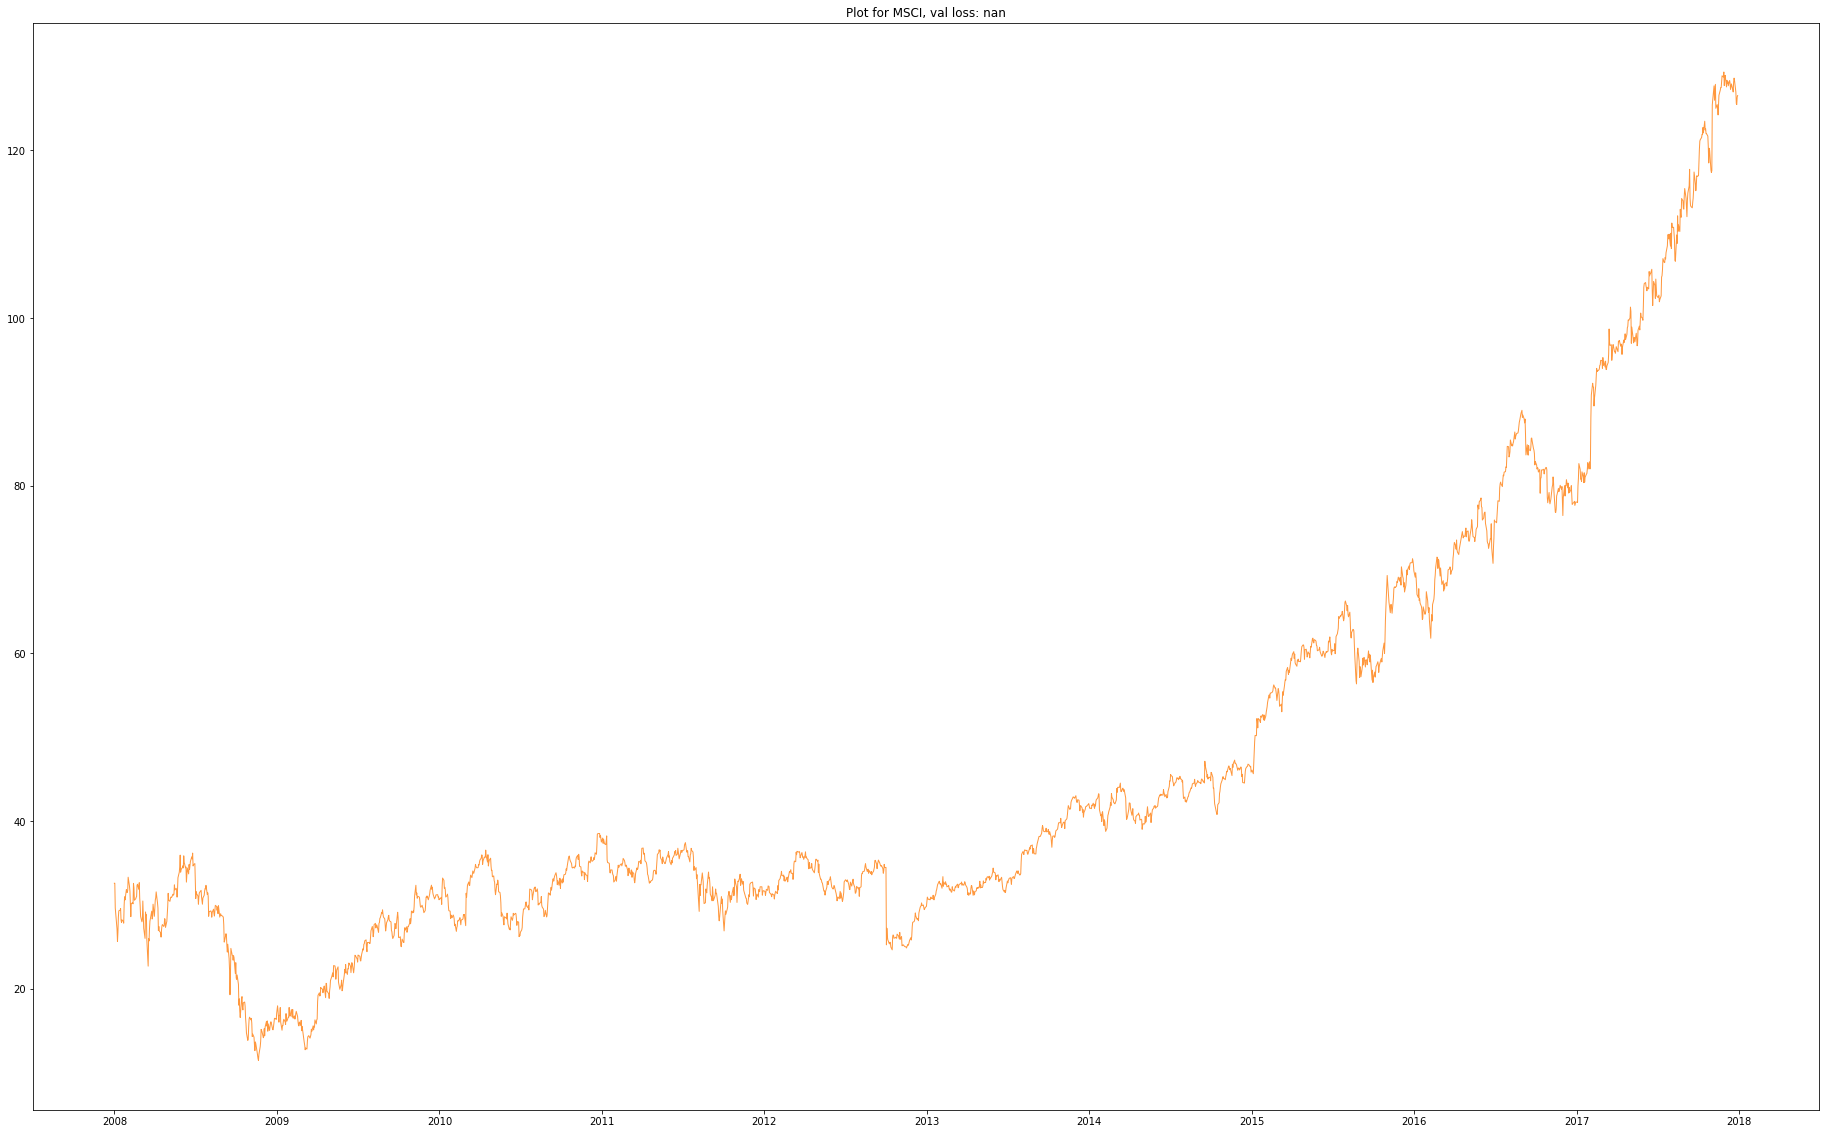

In [22]:
EPOCHS = 20

for i, (ticker, ds) in enumerate(stocks_data.items()):
    train_generator = ds['train_generator']
    valid_generator = ds['valid_generator']
    test_generator = ds['test_generator']
    
    OUTPUT_SIZE = 1
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_length, OUTPUT_SIZE * len(x_columns))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(OUTPUT_SIZE))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Tensorboard
    tensorboard = TensorBoard(log_dir='logs/{}-{}'.format(ticker, time()))
    
    # Checkpoint
    filepath='modelsneg/weightsbest.hdf5'.format(ticker)
#     checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [tensorboard]
    
    print('*' * 5 + 'Training for {}'.format(ticker))
    model.fit_generator(
        train_generator, 
        validation_data=valid_generator, 
        shuffle=False,
        epochs=EPOCHS, 
        verbose=1, 
        callbacks=callbacks_list
    )
    model.save(filepath)
    
    
    
    # --Plots while training
    val_loss = model.evaluate_generator(valid_generator)
    print('Val loss for {}: {}'.format(ticker, val_loss))
    
    # Make test predictions
    test_predict = model.predict_generator(test_generator)
    predicted_df = pd.DataFrame(y_scaler.inverse_transform(test_predict))
    predicted_df = predicted_df.rename(columns={0: ticker})
    
    original_test = stocks_data[ticker]['y_test'].iloc[window_length:]
    predicted_df.index = original_test.index
    
    predicted_ticker = pd.concat([predicted_df[ticker], original_test], axis=1)
    
    %matplotlib inline
    plt.figure(figsize=(32, 20))

    plt.plot(predicted_ticker[ticker], linewidth=1, alpha=0.8)
    plt.plot(stocks_data[ticker]['y'], linewidth=1, alpha=0.8)
    plt.title('Plot for {}, val loss: {}'.format(ticker.upper(), val_loss))
    plt.savefig('plotsneg/'.format(ticker))
#     plt.show()

Val loss for msci: nan


FileNotFoundError: [Errno 2] No such file or directory: 'plots/msci.png'

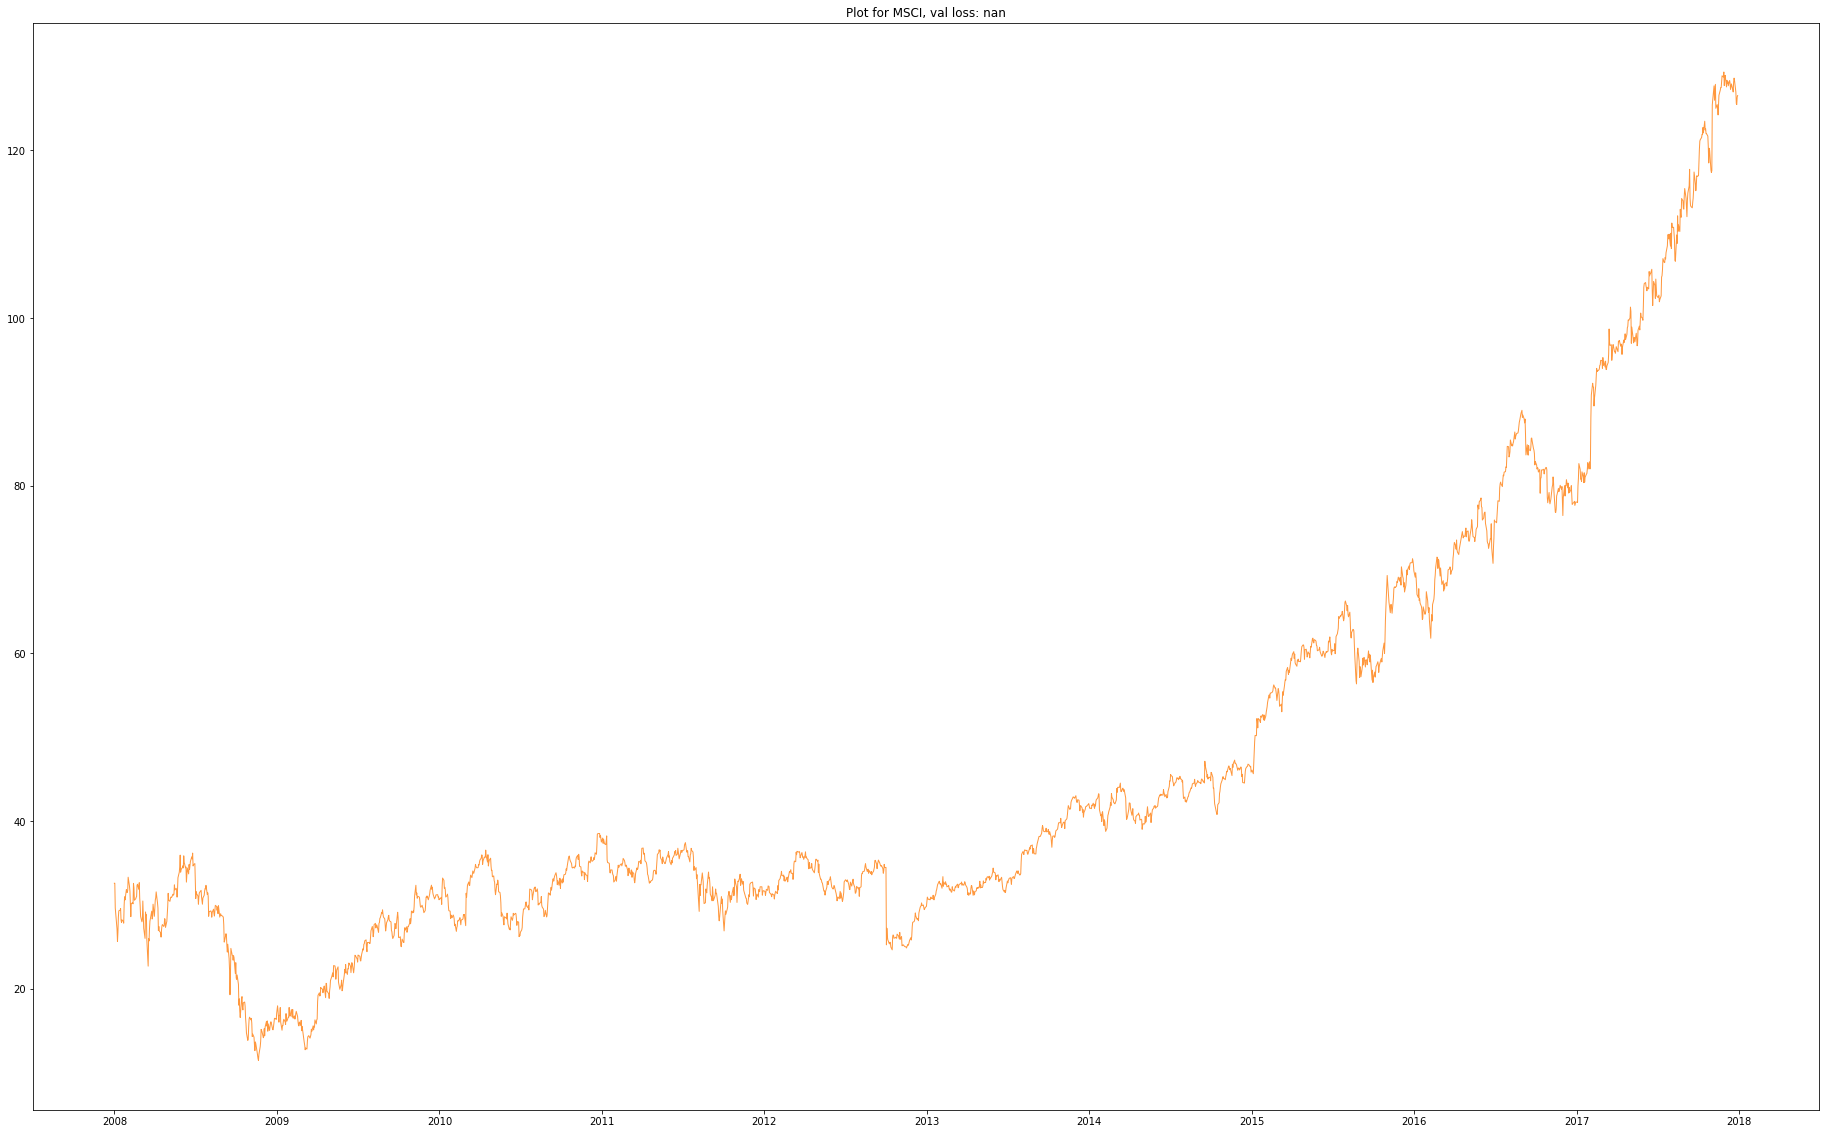

In [24]:
for i, (ticker, ds) in enumerate(stocks_data.items()):
    train_generator = ds['train_generator']
    valid_generator = ds['valid_generator']
    test_generator = ds['test_generator']
    
    x_scaler = ds['x_scaler']
    y_scaler = ds['y_scaler']
    
    filepath='modelsneg/weightsbest.hdf5'.format(ticker)
    OUTPUT_SIZE = 1
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_length, OUTPUT_SIZE * len(x_columns))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(OUTPUT_SIZE))
    
    model.load_weights(filepath)

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    val_loss = model.evaluate_generator(valid_generator)
    print('Val loss for {}: {}'.format(ticker, val_loss))
    
    # Make test predictions
    test_predict = model.predict_generator(test_generator)
    predicted_df = pd.DataFrame(y_scaler.inverse_transform(test_predict))
    predicted_df = predicted_df.rename(columns={0: ticker})
    
    original_test = stocks_data[ticker]['y_test'].iloc[window_length:]
    predicted_df.index = original_test.index
    
    predicted_ticker = pd.concat([predicted_df[ticker], original_test], axis=1)
    
    %matplotlib inline
    plt.figure(figsize=(32, 20))

    plt.plot(predicted_ticker[ticker], linewidth=1, alpha=0.8)
    plt.plot(stocks_data[ticker]['y'], linewidth=1, alpha=0.8)
    plt.title('Plot for {}, val loss: {}'.format(ticker.upper(), val_loss))
    plt.savefig('plots/{}'.format(ticker))
    plt.show()